In [1]:
import pandas as pd

# Remplace le chemin ci-dessous par l'emplacement exact du fichier
file_path = r"C:\Users\JULIO MALEKA\Downloads\loan_data.csv"

# Charger le dataset
df = pd.read_csv(file_path)

# Afficher les premières lignes pour vérifier l'importation
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
# Afficher les dimensions du dataset (nombre de lignes, nombre de colonnes)
print("Dimensions du dataset :", df.shape)

# Afficher les informations sur les colonnes (types de données, valeurs non nulles)
print("\nInformations sur les données :")
df.info()

# Afficher les statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# Vérifier la présence de valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Vérifier la présence de doublons
print("\nNombre de doublons :", df.duplicated().sum())

# Afficher les premières lignes du dataset
df.head()


Dimensions du dataset : (45000, 14)

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score             

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Valeurs uniques dans {col} : {df[col].unique()}")


Valeurs uniques dans person_gender : ['female' 'male']
Valeurs uniques dans person_education : ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Valeurs uniques dans person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Valeurs uniques dans loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Valeurs uniques dans previous_loan_defaults_on_file : ['No' 'Yes']


In [4]:
# 1. Suppression des doublons (si nécessaire)
df = df.drop_duplicates()
print("Nombre de doublons après suppression :", df.duplicated().sum())

Nombre de doublons après suppression : 0


In [5]:
# 2. Gestion des valeurs manquantes
print("\nValeurs manquantes après analyse :")
print(df.isnull().sum())


Valeurs manquantes après analyse :
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [6]:
# 3. Vérification et conversion des types de données
print("\nTypes de données avant conversion :")
print(df.dtypes)


Types de données avant conversion :
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [7]:
# 1. Encodage binaire pour les variables à 2 catégories
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})


In [29]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

KeyError: "None of [Index(['person_home_ownership', 'loan_intent'], dtype='object')] are in the [columns]"

In [9]:
education_mapping = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_mapping)

In [25]:
print(df.head())  # Voir les premières lignes
print(df.info())  # Vérifier les types de données

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

In [10]:
# Afficher les premières lignes du dataset
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,False,False,True,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,False,True,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,False,False,True,False,False,True,False,False


In [12]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

KeyError: "None of [Index(['person_home_ownership', 'loan_intent'], dtype='object')] are in the [columns]"

In [11]:
from sklearn.model_selection import train_test_split

# Définir les features (X) et la target (y)
X = df.drop(columns=['loan_status'])  # Supprime la colonne cible
y = df['loan_status']  # Variable cible (0 = bon crédit, 1 = défaut de paiement)

# Séparer en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérifier la taille des datasets
print("Taille du dataset d'entraînement :", X_train.shape)
print("Taille du dataset de test :", X_test.shape)


Taille du dataset d'entraînement : (36000, 19)
Taille du dataset de test : (9000, 19)


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standardiseur
scaler = StandardScaler()

# Appliquer la transformation sur les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des nouvelles dimensions
print("Dimensions après standardisation - X_train:", X_train_scaled.shape)
print("Dimensions après standardisation - X_test:", X_test_scaled.shape)

Dimensions après standardisation - X_train: (36000, 19)
Dimensions après standardisation - X_test: (9000, 19)


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standardiseur
scaler = StandardScaler()

# Appliquer la transformation sur les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des nouvelles dimensions
print("Dimensions après standardisation - X_train:", X_train_scaled.shape)
print("Dimensions après standardisation - X_test:", X_test_scaled.shape)

Dimensions après standardisation - X_train: (36000, 19)
Dimensions après standardisation - X_test: (9000, 19)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
log_reg = LogisticRegression(max_iter=500)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2'],  # Type de pénalité
    'solver': ['liblinear']  # Compatible avec L1 et L2
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle entraîné
best_model = grid_search.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_model.score(X_train_scaled, y_train)
test_score = best_model.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred = best_model.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Score sur le TRAIN : 0.8958333333333334
Score sur le TEST : 0.8994444444444445

Accuracy : 0.8994444444444445

Matrice de confusion :
 [[6599  401]
 [ 504 1496]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
tree_clf = DecisionTreeClassifier(random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],  # Fonction pour mesurer la qualité de la division
    'max_depth': [3, 5, 10, None],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 5]  # Nombre min d'échantillons dans une feuille
}

# Initialiser GridSearchCV
grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_tree.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_tree.best_params_)

# Meilleur modèle entraîné
best_tree = grid_search_tree.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_tree.score(X_train_scaled, y_train)
test_score = best_tree.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_tree = best_tree.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_tree))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_tree))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}

Score sur le TRAIN : 0.9279722222222222
Score sur le TEST : 0.9201111111111111

Accuracy : 0.9201111111111111

Matrice de confusion :
 [[6829  171]
 [ 548 1452]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7000
           1       0.89      0.73      0.80      2000

    accuracy                           0.92      9000
   macro avg       0.91      0.85      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100],  # Nombre d'arbres
    'criterion': ['gini', 'entropy'],  # Fonction de mesure de la qualité des divisions
    'max_depth': [5, 10, 15],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 5]  # Nombre min d'échantillons dans une feuille
}

# Initialiser GridSearchCV
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_rf.best_params_)

# Meilleur modèle entraîné
best_rf = grid_search_rf.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_rf.score(X_train_scaled, y_train)
test_score = best_rf.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_rf = best_rf.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_rf))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Score sur le TRAIN : 0.9591111111111111
Score sur le TEST : 0.9281111111111111

Accuracy : 0.9281111111111111

Matrice de confusion :
 [[6840  160]
 [ 487 1513]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7000
           1       0.90      0.76      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
adaboost_clf = AdaBoostClassifier(random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'estimateurs (arbres faibles)
    'learning_rate': [0.01, 0.1, 1, 10],  # Taux d'apprentissage
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithme d'optimisation
}

# Initialiser GridSearchCV
grid_search_ada = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_ada.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_ada.best_params_)

# Meilleur modèle entraîné
best_ada = grid_search_ada.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_ada.score(X_train_scaled, y_train)
test_score = best_ada.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_ada = best_ada.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_ada))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_ada))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_ada))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs hyperparamètres : {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}

Score sur le TRAIN : 0.9195
Score sur le TEST : 0.922

Accuracy : 0.922

Matrice de confusion :
 [[6725  275]
 [ 427 1573]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7000
           1       0.85      0.79      0.82      2000

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
gb_clf = GradientBoostingClassifier(random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100],  # Nombre d'arbres
    'learning_rate': [0.01, 0.1],  # Taux d'apprentissage
    'max_depth': [3, 5],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5],  # Nombre min d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2]  # Nombre min d'échantillons dans une feuille
}

# Initialiser GridSearchCV
grid_search_gb = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_gb.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_gb.best_params_)

# Meilleur modèle entraîné
best_gb = grid_search_gb.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_gb.score(X_train_scaled, y_train)
test_score = best_gb.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_gb = best_gb.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_gb))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_gb))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Score sur le TRAIN : 0.9382777777777778
Score sur le TEST : 0.9316666666666666

Accuracy : 0.9316666666666666

Matrice de confusion :
 [[6823  177]
 [ 438 1562]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.78      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100],  # Nombre d'arbres
    'learning_rate': [0.01, 0.1],  # Taux d'apprentissage
    'max_depth': [3, 5],  # Profondeur maximale de chaque arbre
    'subsample': [0.7, 1.0],  # Fraction des échantillons utilisés pour construire chaque arbre
    'colsample_bytree': [0.7, 1.0]  # Fraction des features utilisées pour construire chaque arbre
}

# Initialiser GridSearchCV
grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_xgb.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_xgb.best_params_)

# Meilleur modèle entraîné
best_xgb = grid_search_xgb.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_xgb.score(X_train_scaled, y_train)
test_score = best_xgb.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_xgb = best_xgb.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_xgb))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_xgb))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:47:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs hyperparamètres : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}

Score sur le TRAIN : 0.935
Score sur le TEST : 0.9295555555555556

Accuracy : 0.9295555555555556

Matrice de confusion :
 [[6808  192]
 [ 442 1558]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.89      0.78      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [36]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
cat_clf = CatBoostClassifier(verbose=0, random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'iterations': [100, 300],  # Nombre d'itérations (arbres)
    'learning_rate': [0.01, 0.1],  # Taux d'apprentissage
    'depth': [4, 6],  # Profondeur maximale des arbres
    'l2_leaf_reg': [1, 3,5],  # Régularisation L2 pour éviter l'overfitting
}

# Initialiser GridSearchCV
grid_search_cat = GridSearchCV(cat_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_cat.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_cat.best_params_)

# Meilleur modèle entraîné
best_cat = grid_search_cat.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_cat.score(X_train_scaled, y_train)
test_score = best_cat.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_cat = best_cat.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_cat))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_cat))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_cat))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs hyperparamètres : {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

Score sur le TRAIN : 0.9454166666666667
Score sur le TEST : 0.934

Accuracy : 0.934

Matrice de confusion :
 [[6814  186]
 [ 408 1592]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.80      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [37]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définir le modèle de base
lgbm_clf = LGBMClassifier(random_state=42)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 300],  # Nombre d'arbres
    'learning_rate': [0.01, 0.1],  # Taux d'apprentissage
    'max_depth': [-1, 5],  # Profondeur maximale des arbres (-1 signifie pas de limite)
    'num_leaves': [20, 31],  # Nombre de feuilles par arbre
    'min_child_samples': [10, 20]  # Nombre minimum d'échantillons par feuille
}

# Initialiser GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_lgbm.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search_lgbm.best_params_)

# Meilleur modèle entraîné
best_lgbm = grid_search_lgbm.best_estimator_

# Scores sur le jeu d'entraînement et de test
train_score = best_lgbm.score(X_train_scaled, y_train)
test_score = best_lgbm.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_lgbm = best_lgbm.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_lgbm))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_lgbm))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_lgbm))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Number of positive: 8000, number of negative: 28000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 300, 'num_leaves': 20}

Score sur le TRAIN : 0.9611388888888889
Score sur le TEST : 0.9357777777777778

Accuracy : 0.9357777777777778

Matrice de confusion :
 [[6811  189]
 [ 389 1611]]

Rapport de classification :
               precision    recall  f1-score   support

 

In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définition des modèles de base
base_models = [
    ('log_reg', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lightgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Modèle meta (final) : on choisit une régression logistique
meta_model = LogisticRegression()

# Définition du Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Entraîner le modèle de stacking
stacking_clf.fit(X_train_scaled, y_train)

# Scores sur le jeu d'entraînement et de test
train_score = stacking_clf.score(X_train_scaled, y_train)
test_score = stacking_clf.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_stack))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_stack))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_stack))


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:59:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 8000, number of negative: 28000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:00:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:00:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 6400, number of negative: 22400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Info] Number of positive: 6400, number of negative: 22400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 19
[LightGBM] [Info] [b

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Définition des modèles de base
base_models = [
    ('log_reg', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lightgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Modèle meta (final) : on choisit une régression logistique
meta_model = LogisticRegression()

# Définition du Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Entraîner le modèle de stacking
stacking_clf.fit(X_train_scaled, y_train)

# Scores sur le jeu d'entraînement et de test
train_score = stacking_clf.score(X_train_scaled, y_train)
test_score = stacking_clf.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_stack))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_stack))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_stack))


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:13:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 8000, number of negative: 28000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:13:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 6400, number of negative: 22400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222222 -> initscore=-1.252763
[LightGBM] [Info] Start training from score -1.252763
[LightGBM] [Info] Number of positive: 6400, number of negative: 22400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 19
[LightGBM] [Info] [b

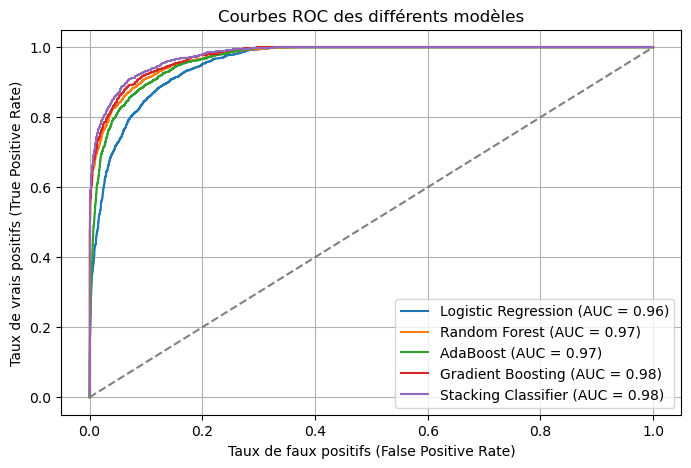

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Liste des modèles entraînés
models = {
    "Logistic Regression": best_model,  # Remplace par ton meilleur modèle de régression logistique
    "Random Forest": best_rf,  # Remplace par ton meilleur Random Forest
    "AdaBoost": best_ada,            # Remplace par ton meilleur AdaBoost
    "Gradient Boosting": best_gb,         # Remplace par ton meilleur Gradient Boosting
    "Stacking Classifier": stacking_clf   # Modèle de stacking
}

# Initialisation du graphique
plt.figure(figsize=(8, 5))

# Tracer la courbe ROC pour chaque modèle
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité de la classe positive
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Ajouter la ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Personnalisation du graphique
plt.xlabel("Taux de faux positifs (False Positive Rate)")
plt.ylabel("Taux de vrais positifs (True Positive Rate)")
plt.title("Courbes ROC des différents modèles")
plt.legend(loc="lower right")
plt.grid()

# Afficher la courbe ROC
plt.show()


In [44]:
def contaminate_labels(y_train, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_train_contaminated = y_train.copy()

    # Nombre d'échantillons à contaminer
    n_samples = len(y_train)
    n_contaminated = int(n_samples * contamination_rate)

    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)

    # Modifier les labels (0 devient 1 et 1 devient 0) avec iloc
    y_train_contaminated.iloc[indices_to_flip] = 1 - y_train_contaminated.iloc[indices_to_flip]

    return y_train_contaminated


In [94]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer les labels
y_train_contaminated = contaminate_labels(y_train)
y_test_contaminated = contaminate_labels(y_test)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
log_reg = LogisticRegression(max_iter=500)

# Grille des hyperparamètres
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle
best_model1 = grid_search.best_estimator_

# Scores
train_score = best_model.score(X_train_scaled, y_train_contaminated)
test_score = best_model.score(X_test_scaled, y_test_contaminated)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred = best_model.predict(X_test_scaled)

# Évaluation
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
print("\nAccuracy :", accuracy_score(y_test_contaminated, y_pred))
print("F1 Score :", f1_score(y_test_contaminated, y_pred))
print("ROC-AUC Score :", roc_auc_score(y_test_contaminated, y_pred_proba))
print("\nMatrice de confusion :\n", confusion_matrix(y_test_contaminated, y_pred))
print("\nRapport de classification :\n", classification_report(y_test_contaminated, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs hyperparamètres : {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

Score sur le TRAIN : 0.8150555555555555
Score sur le TEST : 0.8183333333333334

Accuracy : 0.8183333333333334
F1 Score : 0.6269678302532512
ROC-AUC Score : 0.8059740626723653

Matrice de confusion :
 [[5991  523]
 [1112 1374]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      6514
           1       0.72      0.55      0.63      2486

    accuracy                           0.82      9000
   macro avg       0.78      0.74      0.75      9000
weighted avg       0.81      0.82      0.81      9000



In [51]:
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement les labels de y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
tree_clf = DecisionTreeClassifier(random_state=42)

# Grille des hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# GridSearchCV
grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_tree.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_tree.best_params_)

# Meilleur modèle
best_tree1 = grid_search_tree.best_estimator_

# Scores
train_score = best_tree.score(X_train_scaled, y_train_contaminated)
test_score = best_tree.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_tree = best_tree.predict(X_test_scaled)

# Évaluation
y_pred_proba_tree = best_tree.predict_proba(X_test_scaled)[:, 1]
print("\nAccuracy :", accuracy_score(y_test, y_pred_tree))
print("F1 Score :", f1_score(y_test, y_pred_tree))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_tree))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_tree))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

Score sur le TRAIN : 0.8414722222222222
Score sur le TEST : 0.9201111111111111

Accuracy : 0.9201111111111111
F1 Score : 0.8015456803753795
ROC-AUC Score : 0.9630545357142858

Matrice de confusion :
 [[6829  171]
 [ 548 1452]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7000
           1       0.89      0.73      0.80      2000

    accuracy                           0.92      9000
   macro avg       0.91      0.85      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [83]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement les labels de y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5]
}

# GridSearchCV
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_rf.best_params_)

# Meilleur modèle
best_rf1 = grid_search_rf.best_estimator_

# Scores
train_score = best_rf.score(X_train_scaled, y_train_contaminated)
test_score = best_rf.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Évaluation
y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
print("\nAccuracy :", accuracy_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_rf))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Score sur le TRAIN : 0.8667777777777778
Score sur le TEST : 0.9281111111111111

Accuracy : 0.9281111111111111
F1 Score : 0.8238497141301389
ROC-AUC Score : 0.9737512857142856

Matrice de confusion :
 [[6840  160]
 [ 487 1513]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7000
           1       0.90      0.76      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [53]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement les labels de y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
adaboost_clf = AdaBoostClassifier(random_state=42)

# Grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# GridSearchCV
grid_search_ada = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_ada.best_params_)

# Meilleur modèle
best_ada1 = grid_search_ada.best_estimator_

# Scores
train_score = best_ada.score(X_train_scaled, y_train_contaminated)
test_score = best_ada.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_ada = best_ada.predict(X_test_scaled)

# Évaluation
y_pred_proba_ada = best_ada.predict_proba(X_test_scaled)[:, 1]
print("\nAccuracy :", accuracy_score(y_test, y_pred_ada))
print("F1 Score :", f1_score(y_test, y_pred_ada))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_ada))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_ada))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_ada))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs hyperparamètres : {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}

Score sur le TRAIN : 0.8347777777777777
Score sur le TEST : 0.922

Accuracy : 0.922
F1 Score : 0.8175675675675675
ROC-AUC Score : 0.967860392857143

Matrice de confusion :
 [[6725  275]
 [ 427 1573]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7000
           1       0.85      0.79      0.82      2000

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [54]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
gb_clf = GradientBoostingClassifier(random_state=42)

# Grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
grid_search_gb = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_gb.best_params_)

# Meilleur modèle
best_gb1 = grid_search_gb.best_estimator_

# Scores
train_score = best_gb.score(X_train_scaled, y_train_contaminated)
test_score = best_gb.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_gb = best_gb.predict(X_test_scaled)
y_pred_proba_gb = best_gb.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("\nAccuracy :", accuracy_score(y_test, y_pred_gb))
print("F1 Score :", f1_score(y_test, y_pred_gb))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_gb))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_gb))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Score sur le TRAIN : 0.8492777777777778
Score sur le TEST : 0.9316666666666666

Accuracy : 0.9316666666666666
F1 Score : 0.8355175180529553
ROC-AUC Score : 0.9765732857142857

Matrice de confusion :
 [[6823  177]
 [ 438 1562]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.78      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [56]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_xgb.best_params_)

# Meilleur modèle
best_xgb1 = grid_search_xgb.best_estimator_

# Scores
train_score = best_xgb.score(X_train_scaled, y_train_contaminated)
test_score = best_xgb.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_xgb = best_xgb.predict(X_test_scaled)
y_pred_proba_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("\nAccuracy :", accuracy_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_xgb))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_xgb))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs hyperparamètres : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}

Score sur le TRAIN : 0.8468888888888889
Score sur le TEST : 0.9295555555555556

Accuracy : 0.9295555555555556
F1 Score : 0.8309333333333333
ROC-AUC Score : 0.9758652142857143

Matrice de confusion :
 [[6808  192]
 [ 442 1558]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.89      0.78      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [57]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
cat_clf = CatBoostClassifier(verbose=0, random_state=42)

# Grille des hyperparamètres
param_grid = {
    'iterations': [100, 300],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3, 5],
}

# GridSearchCV
grid_search_cat = GridSearchCV(cat_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_cat.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_cat.best_params_)

# Meilleur modèle
best_cat1 = grid_search_cat.best_estimator_

# Scores
train_score = best_cat.score(X_train_scaled, y_train_contaminated)
test_score = best_cat.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_cat = best_cat.predict(X_test_scaled)
y_pred_proba_cat = best_cat.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("\nAccuracy :", accuracy_score(y_test, y_pred_cat))
print("F1 Score :", f1_score(y_test, y_pred_cat))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_cat))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_cat))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_cat))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs hyperparamètres : {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

Score sur le TRAIN : 0.8555277777777778
Score sur le TEST : 0.934

Accuracy : 0.934
F1 Score : 0.8427739544732663
ROC-AUC Score : 0.9776752857142857

Matrice de confusion :
 [[6814  186]
 [ 408 1592]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.80      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [58]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    
    # Nombre d'échantillons à contaminer
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    
    # Sélection aléatoire des indices à modifier
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    
    # Modifier les labels (0 devient 1 et 1 devient 0)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    
    return y_contaminated

# Contaminer uniquement y_train
y_train_contaminated = contaminate_labels(y_train)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
lgbm_clf = LGBMClassifier(random_state=42)

# Grille des hyperparamètres
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [-1, 5],
    'num_leaves': [20, 31],
    'min_child_samples': [10, 20]
}

# GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lgbm.fit(X_train_scaled, y_train_contaminated)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search_lgbm.best_params_)

# Meilleur modèle
best_lgbm1 = grid_search_lgbm.best_estimator_

# Scores
train_score = best_lgbm.score(X_train_scaled, y_train_contaminated)
test_score = best_lgbm.score(X_test_scaled, y_test)
print("\nScore sur le TRAIN :", train_score)
print("Score sur le TEST :", test_score)

# Prédictions
y_pred_lgbm = best_lgbm.predict(X_test_scaled)
y_pred_proba_lgbm = best_lgbm.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("\nAccuracy :", accuracy_score(y_test, y_pred_lgbm))
print("F1 Score :", f1_score(y_test, y_pred_lgbm))
print("ROC-AUC Score :", roc_auc_score(y_test, y_pred_proba_lgbm))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_lgbm))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_lgbm))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Number of positive: 9956, number of negative: 26044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276556 -> initscore=-0.961612
[LightGBM] [Info] Start training from score -0.961612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [59]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fonction pour contaminer les labels
def contaminate_labels(y, contamination_rate=0.1, random_state=42):
    np.random.seed(random_state)
    y_contaminated = y.copy()
    n_samples = len(y)
    n_contaminated = int(n_samples * contamination_rate)
    indices_to_flip = np.random.choice(n_samples, n_contaminated, replace=False)
    y_contaminated.iloc[indices_to_flip] = 1 - y_contaminated.iloc[indices_to_flip]
    return y_contaminated

# Contaminer uniquement y_train
y_train_contaminated = contaminate_labels(y_train)

# Définition des modèles de base
base_models = [
    ('log_reg', LogisticRegression()),
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lightgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

# Modèle meta (final) : Régression logistique
meta_model = LogisticRegression()

# Définition du Stacking Classifier
stacking_clf1 = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Entraîner le modèle de stacking
stacking_clf1.fit(X_train_scaled, y_train_contaminated)

# Scores sur le jeu d'entraînement et de test
train_score = stacking_clf1.score(X_train_scaled, y_train_contaminated)
test_score = stacking_clf1.score(X_test_scaled, y_test)

print("\nScore sur le TRAIN :", train_score)
print("\nScore sur le TEST :", test_score)

# Prédiction sur l'ensemble de test
y_pred_stack = stacking_clf1.predict(X_test_scaled)

# Évaluation du modèle
print("\nAccuracy :", accuracy_score(y_test, y_pred_stack))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_stack))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_stack))


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:43:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 9956, number of negative: 26044
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276556 -> initscore=-0.961612
[LightGBM] [Info] Start training from score -0.961612


C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:44:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:44:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JULIO MALEKA\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



[LightGBM] [Info] Number of positive: 7965, number of negative: 20835
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276562 -> initscore=-0.961577
[LightGBM] [Info] Start training from score -0.961577
[LightGBM] [Info] Number of positive: 7965, number of negative: 20835
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 19
[LightGBM] [Info] [b

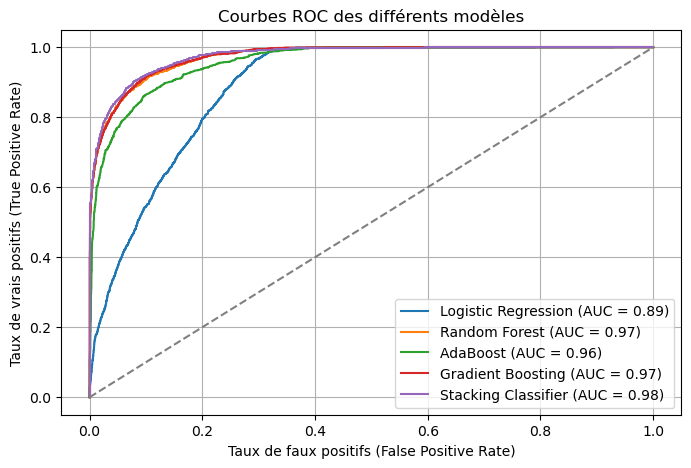

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Liste des modèles entraînés
models = {
    "Logistic Regression": best_model1,  # Remplace par ton meilleur modèle de régression logistique
    "Random Forest": best_rf1,  # Remplace par ton meilleur Random Forest
    "AdaBoost": best_ada1,            # Remplace par ton meilleur AdaBoost
    "Gradient Boosting": best_gb1,         # Remplace par ton meilleur Gradient Boosting
    "Stacking Classifier": stacking_clf1   # Modèle de stacking
}

# Initialisation du graphique
plt.figure(figsize=(8, 5))

# Tracer la courbe ROC pour chaque modèle
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité de la classe positive
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Ajouter la ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Personnalisation du graphique

plt.xlabel("Taux de faux positifs (False Positive Rate)")
plt.ylabel("Taux de vrais positifs (True Positive Rate)")
plt.title("Courbes ROC des différents modèles")
plt.legend(loc="lower right")
plt.grid()

# Afficher la courbe ROC
plt.show()


In [64]:
print(df['loan_status'].value_counts(normalize=True) * 100)


loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


In [65]:
print(df['loan_status'].value_counts())



loan_status
0    35000
1    10000
Name: count, dtype: int64


In [95]:
print(df['loan_status'].value_counts())

loan_status
0    35000
1    10000
Name: count, dtype: int64


In [13]:
# Importance des features
feature_importances = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": best_rf.feature_importances_}
)

# Trier par importance décroissante
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Affichage
plt.figure(figsize=(8, 5))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Importance des Features ")
plt.gca().invert_yaxis()
plt.show()

NameError: name 'best_rf' is not defined

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)


ValueError: could not convert string to float: 'female'

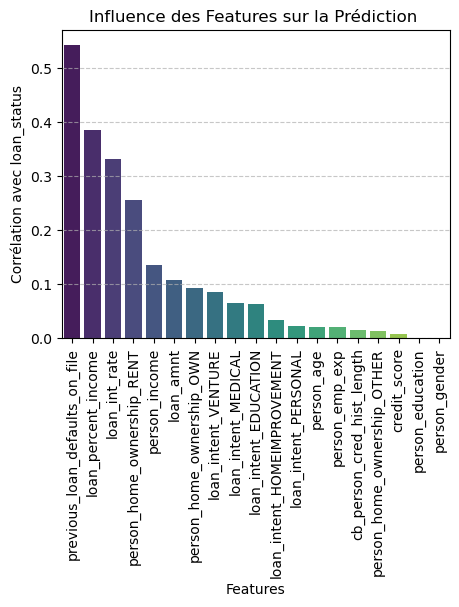

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul des coefficients de corrélation avec la variable cible
feature_importance = df.corr()["loan_status"].drop("loan_status")  # Exclure la target elle-même
feature_importance = feature_importance.abs().sort_values(ascending=False)  # Valeurs absolues et tri décroissant

# Tracer l'histplot des coefficients
plt.figure(figsize=(5, 4))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette="viridis")

# Personnalisation du graphique
plt.xticks(rotation=90)  # Rotation des labels pour une meilleure lisibilité
plt.xlabel("Features")
plt.ylabel("Corrélation avec loan_status")
plt.title("Influence des Features sur la Prédiction ")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()


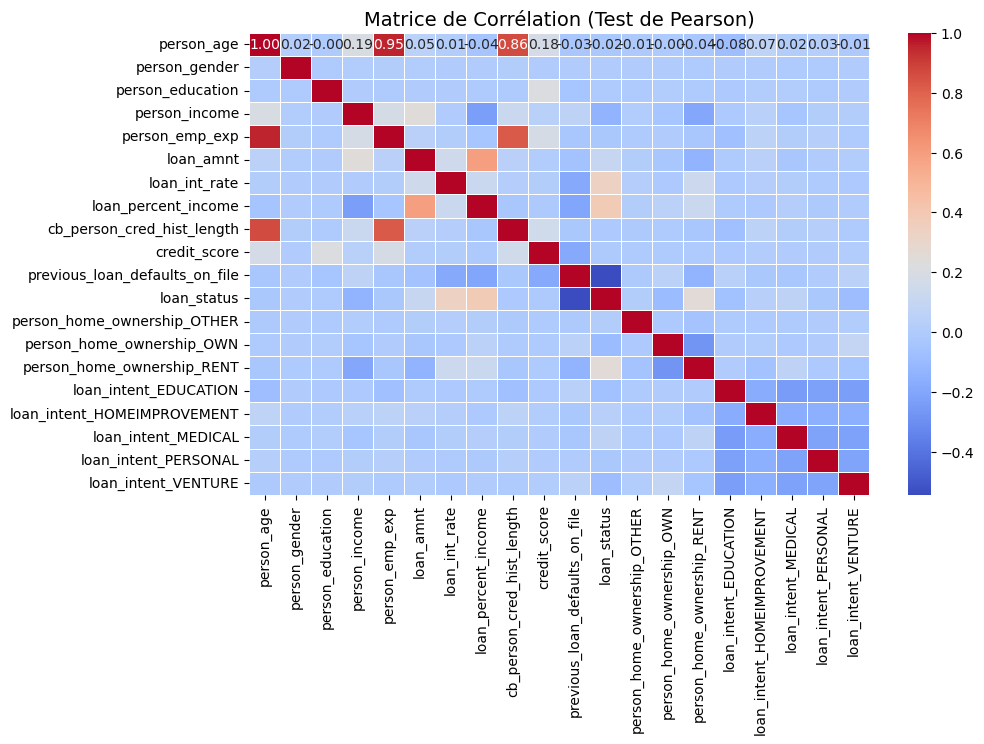

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage du Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Personnalisation du graphique
plt.title("Matrice de Corrélation (Test de Pearson)", fontsize=14)
plt.xticks(rotation=90)  # Rotation des labels pour lisibilité
plt.yticks(rotation=0)

# Afficher le graphique
plt.show()


In [32]:
print(df)

       person_age  person_gender  person_education  person_income  \
0            22.0              0                 4        71948.0   
1            21.0              0                 1        12282.0   
2            25.0              0                 1        12438.0   
3            23.0              0                 3        79753.0   
4            24.0              1                 4        66135.0   
...           ...            ...               ...            ...   
44995        27.0              1                 2        47971.0   
44996        37.0              0                 2        65800.0   
44997        33.0              1                 2        56942.0   
44998        29.0              1                 3        33164.0   
44999        24.0              1                 1        51609.0   

       person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  \
0                   0    35000.0          16.02                 0.49   
1                   0     1